# Importing libraries

In [14]:
# for calculation
import numpy as np
# for tasks related to files
import pandas as pd
# for visvalization 
import matplotlib.pyplot as plt
# for visvalization 
import seaborn as sns

# for checking our models performance (difference between, what was actual value and what our model predicted)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Reading CSV using pandas
* <b>About data</b> : It contains a person's experience, their scores and the salary offered

In [4]:
df = pd.read_csv('salary.csv')

In [3]:
df.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


# Pandas describe gives us different values for our data

* <b>Count</b> - counts the number of entries (rows it has)
* <b>Mean</b> - What is the average for each column
* <b>Standard deviation</b> - how much distance our data point have from our mean (dispersion our data have from the mean)
* <b>Min</b> - Minimum value in each column
* <b>25%, 50%, 75%</b> - These values are our percentiles - (How much percent data is in this range)
* <b>Max</b> - maximum value for each column 

In [4]:
df.describe()

,test_score,interview_score,Salary
count,19.000000,19.000000,20.000000
mean,5.447368,5.657895,30350.000000
std,2.832817,2.516902,19780.439567
min,1.000000,1.000000,500.000000
25%,3.000000,4.500000,12750.000000
50%,5.000000,6.000000,27500.000000
75%,8.000000,7.750000,48500.000000
max,9.000000,9.000000,60000.000000


* <b>Info()</b> - tells us about type, shape, memory of the dataset (our the columns in our dataset)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [7]:
# As we can see many NaN values in experience and 1-1 in other two
df

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000
5,NaN,2.0,1.0,9000
6,ten,8.0,6.0,48000
7,one,1.0,2.0,500
8,fifteen,9.0,9.0,60000
9,thirteen,7.5,7.5,45000


* Checking the standard deviation for the two columns, I left experience column as it has many NaN values, so wanted to check the other        columns first

In [6]:
df.iloc[:, 1:].std()

test_score             2.832817
interview_score        2.516902
Salary             19780.439567
dtype: float64

# Cleaning data - 
* Why mode ? We should try different methods to check models performance, as mean could be affected from the outlier it is sometimes safer                to use mode - it gives us the most frequently occuring value in that column
* Replacing missing values with method - fillna and using mode function on that column

In [8]:
# df = df.loc[df['test_score'].isnull()].apply(lambda x : x.mode())
df['test_score'].fillna(df['test_score'].mode()[0], inplace=True)

In [9]:
# df = df.loc[df['test_score'].isnull()].apply(lambda x : x.mode())
df['interview_score'].fillna(df['interview_score'].mode()[0], inplace=True)

* Created a range of (lower fence - higher fenece) to check if the dataset has any outliers
* We can check lower fence using formula = <b>Q1 - 1.5(IQR)</b>
* Higher fence = <b>Q3 + 1.5(IQR)</b>
* <b>Q1 = 25 percentile and IQR = (Q3 - Q1), where Q3 = 75 percentile</b>
* <b>IQR = Interquartile range (tells us that where most of the data lie)</b>

#### Using this I found out the range (-4.5 - 17.5)

In [10]:
if df.test_score.any() >= 17.5:
    print('Outlier')
else:
    print('No')

No


In [11]:
# checking median
df.test_score.median()

5.0

#### Used boxplot to visvualize the spread of the data for test and interview score column

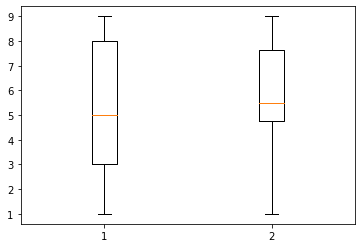

In [15]:
x = df.iloc[:, 1:-1]
plt.boxplot(x)
plt.show()

<AxesSubplot:>

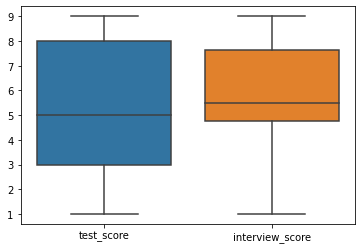

In [16]:
# Seaborn for better visvualization
import seaborn as sns
sns.boxplot(x)

#### Handling categorical values:
* There are several ways to do it - OneHotEncoding, getting dummies and also LabelEncoding(used for dependent labels but could be used for     independent variables)
* But as we can see there not not many unique categories, I decided to go with Map function

In [9]:
df.experience.unique()

array([nan, 'three', 'five', 'six', 'ten', 'one', 'fifteen', 'thirteen',
       'four', 'eleven', 'twelve'], dtype=object)

In [10]:
df['experience'] = df['experience'].map({'three' : 3, 'five' : 5, 'six' : 6, 'ten' : 10, 'one' : 1, 'fifteen' : 15, 'thirteen' : 13, 
                                        'four' : 4, 'eleven' : 11, 'twelve' : 12})

#### After converting categorical to numerical, we can now check the correlation of independent variables to dependent variable 
* As we can see test and interview score are highly co-related to Salary when compared to experience column

In [11]:
df.corr()['Salary']

experience         0.683377
test_score         0.947761
interview_score    0.882128
Salary             1.000000
Name: Salary, dtype: float64

* Handling missing values in experince column, checking with median method

In [19]:
# df = df.loc[df['test_score'].isnull()].apply(lambda x : x.mode())
df['experience'].fillna(df['experience'].median(), inplace=True)

In [20]:
df.head()

,experience,test_score,interview_score,Salary
0,6.0,8.0,8.0,50000
1,6.0,5.0,4.0,22000
2,3.0,6.0,5.0,30000
3,5.0,9.0,9.0,55000
4,6.0,3.0,5.0,13000


# Visvualizing the data
* Here, I used sns's lmplot to put the data points in a scattered manner to get an idea about data
* Used a line - to see the relationship of test_score with Salary

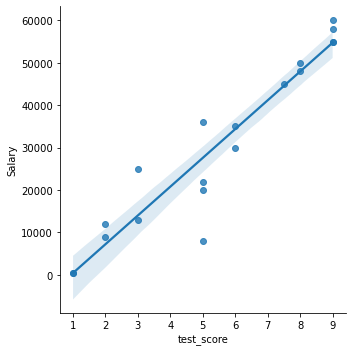

In [21]:
sns.lmplot(x = 'test_score', y = 'Salary', data = df, fit_reg = True)

### Used a line - to see the relationship of interview_score with Salary

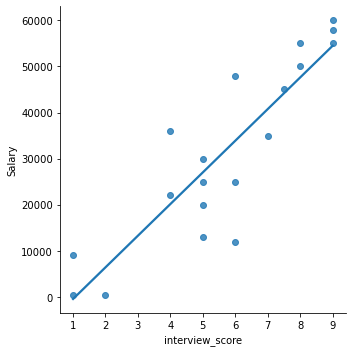

In [16]:
sns.lmplot(x = 'interview_score', y = 'Salary', data = df, fit_reg = True, ci = None)

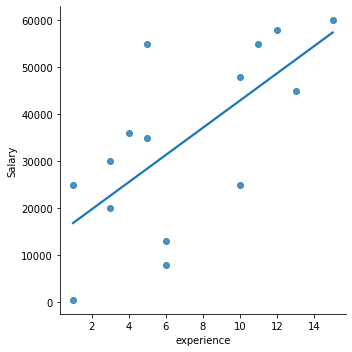

In [17]:
sns.lmplot(x = 'experience', y = 'Salary', data = df, fit_reg = True, ci = None)

In [ ]:
df.plot.hist(y='Salary')
plt.show()
# Looks like a balanced dataset

In [21]:
train = df.loc[:15]
test = df.loc[16:]

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
x_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
x_test = test.iloc[:, :-1]

In [32]:
predictions = model.predict(x_test)

In [33]:
predictions

array([55670.87973574, 12415.32902766, 27404.97262366, 36071.2023821 ])

In [34]:
x_test['predictions'] = predictions

In [35]:
x_test

,experience,test_score,interview_score,predictions
16,12.0,9.0,9.0,55670.879736
17,6.0,2.0,6.0,12415.329028
18,3.0,5.0,5.0,27404.972624
19,5.0,6.0,7.0,36071.202382


In [36]:
x_test['predictions'] = x_test['predictions'].astype('int') # or we can use round()

In [38]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['Salary'], x_test['predictions'])

In [39]:
error

2805.0

In [40]:
errors = test['Salary'] - x_test['predictions']
errors

16    2330
17    -415
18   -7404
19   -1071
dtype: int64

In [41]:
predictors = ['test_score', 'interview_score']
target = 'Salary'

In [42]:
model.fit(train[predictors], train[target])

LinearRegression()

In [43]:
predictions = model.predict(test[predictors])

In [44]:
predictions

array([55713.22661653, 12480.0300527 , 27343.94897903, 36039.52821385])

In [45]:
test['predictions'] = predictions

/tmp/ipykernel_15785/2110851466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


In [46]:
test['predictions'] = test['predictions'].astype('int') # or we can use round()

/tmp/ipykernel_15785/3175162175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = test['predictions'].astype('int') # or we can use round()


In [47]:
test

,experience,test_score,interview_score,Salary,predictions
16,12.0,9.0,9.0,58000,55713
17,6.0,2.0,6.0,12000,12480
18,3.0,5.0,5.0,20000,27343
19,5.0,6.0,7.0,35000,36039


In [48]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test['Salary'], test['predictions'])

In [49]:
# On average we are 2787 behind or made error 
error

2787.25

In [50]:
# As we can our predictions are lower than the standard deviation, this says that our model was not very off
# We also know that it is a balanced dataset and also with no outlier
df.describe()['Salary']

count       20.000000
mean     30350.000000
std      19780.439567
min        500.000000
25%      12750.000000
50%      27500.000000
75%      48500.000000
max      60000.000000
Name: Salary, dtype: float64

In [51]:
errors = test['Salary'] - test['predictions']
errors

16    2287
17    -480
18   -7343
19   -1039
dtype: int64

In [61]:
mae = mean_absolute_error(test['Salary'], test['predictions'])
mse = mean_squared_error(test['Salary'], test['predictions'])
r2 = r2_score(test['Salary'], test['predictions'])



print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 2787.25
MSE is 15114984.75
R2 score is 0.9507153543916853


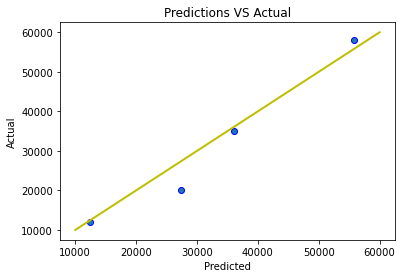

In [74]:
fig, ax = plt.subplots()

x = range(10000, 70000, 10000)
y = range(10000, 70000, 10000)

ax.scatter(test['predictions'], test['Salary'], edgecolors=(0, 0, 1))
ax.plot(x, y, 'y', linewidth=2)
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Predictions VS Actual')
plt.show()